In [1]:
using Plots
gr()
theme(:dark)

In [2]:
indexes = Matrix{Int}(undef, 0, 4)
open("data\\day_05.txt", "r") do file
    for line in eachline(file)
        inds = [parse(Int, i) for pos in split(line, " -> ") for i in split(pos, ",")[end:-1:1]]
        global indexes = [indexes ; transpose(inds)]
    end
end
@show size(indexes);

size(indexes) = (500, 4)


# Puzzle 1

In [3]:
x_size = maximum(indexes[:, [1, 3]]) + 1
y_size = maximum(indexes[:, [2, 4]]) + 1

floor = zeros(Int, x_size, y_size)

for row in eachrow(indexes)
    x0, y0, x1, y1 = row .+ 1
    x0, x1 = sort([x0, x1])
    y0, y1 = sort([y0, y1])
    
    if x0 == x1
        floor[x0, y0:y1] .+= 1
    elseif y0 == y1
        floor[x0:x1, y0] .+= 1
    else
    end
end
@show count(floor .>= 2);

count(floor .>= 2) = 7318


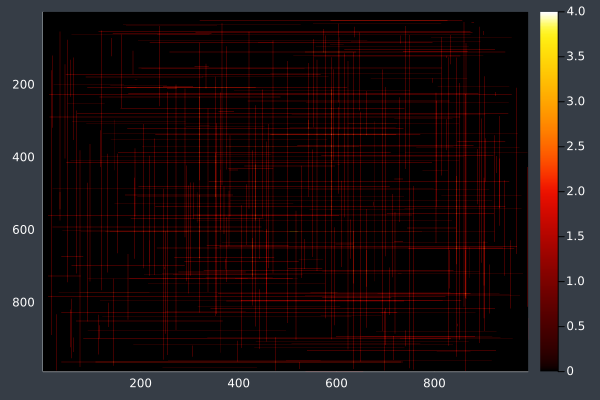

In [4]:
heatmap(floor, yflip=true)

# Puzzle 2

In [5]:
x_size = maximum(indexes[:, [1, 3]]) + 1
y_size = maximum(indexes[:, [2, 4]]) + 1

floor = zeros(Int, x_size, y_size)

for row in eachrow(indexes)
    new_row = row .+ 1
    x0, y0, x1, y1 = new_row
    dx = x1 - x0
    dy = y1 - y0
    x0, x1 = sort([x0, x1])
    y0, y1 = sort([y0, y1])
    #@show new_row, dx, dy
    
    if dx == 0
        floor[x0, y0:y1] .+= 1
    elseif dy == 0
        floor[x0:x1, y0] .+= 1
    elseif dx == dy
        for i in 0:abs(dx)
            floor[x0+i, y0+i] += 1 
            #@show x0+i, y0+i
        end
    elseif dx == -dy
        for i in 0:abs(dx)
            floor[x0+i, y1-i] += 1 
            #@show x0+i, y1-i
        end
    end
    #println(" ")
end
@show count(floor .>= 2);

count(floor .>= 2) = 19939


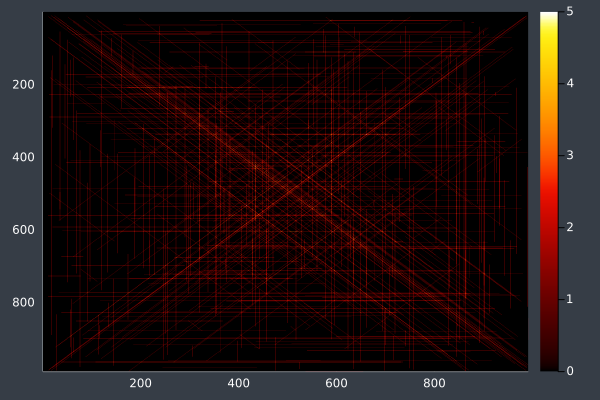

In [6]:
heatmap(floor, yflip=true)